In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## import any library that you will use


Matplotlib is building the font cache; this may take a moment.


## Load Data (don't change anything in this part, just run it)

In [ ]:
df = pd.read_csv("dataFinal.csv")

In [ ]:
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
y_train

8158     3
18368    3
19197    2
3746     5
13073    2
        ..
11284    3
11964    1
5390     3
860      3
15795    4
Name: class, Length: 15480, dtype: int64

## Questions:

### Train the models using X_train and y_train, present test accuracy using test data set X_test, y_test. Don't use test data during training.

### Q1) Assume you want to remove at least two features. Implement a linear regression model to do that, and describe the process. Present the accuracy on test-set, try to improve the accuracy as much as possible.

In [ ]:
# we can look to the coefficents to delete two features.

In [23]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)



In [25]:
y_pred


array([1.21197498, 2.24879649, 3.11435988, ..., 2.19481054, 2.74641729,
       3.89469301])

In [29]:
from sklearn.metrics import accuracy_score

print("Coefficients:", model.coef_)



Coefficients: [ 4.15072093e-01  8.16522590e-03 -1.06875334e-01  7.01253816e-01
,  7.92534488e-06 -3.17355227e-03 -4.39597539e-01 -4.53384400e-01]


In [ ]:
# we can remove f5 and f6 since they have low valued coefficents which means they have low effect on output.

### Q2) Train logistic regression, random forest, and support vector machine models. Present training and test accuracies. Try to figure out whether there is overfitting or underfitting.

In [52]:
from sklearn.svm import SVC # i will implement svc here
from sklearn.metrics import accuracy_score

svm_classifier = SVC(C=1.0, gamma='scale')

svm_classifier.fit(X_train, y_train) # Training our SVM model


y_pred = svm_classifier.predict(X_test) # Make predictions with trained model with test data

In [53]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [54]:
from sklearn.metrics import mean_squared_error # mse is not optimal for classifacation but still gives information
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 1.5689922480620155


In [55]:

r2_score = model.score(X_test, y_test)
print("R2 Score:", r2_score)


R2 Score: 0.5609873545535708


In [56]:


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.40096899224806204


In [ ]:
# by looking at predictions, mse and r2 we can say we are getting underfit with 40 percent accuracy

### Q3) If the test accuracy of a model in Q2 is below 59%, define proper feature engineering and hyperparameter tuning processes to improve its accuracy. Present training and test accuracies. Try to figure out whether there is overfitting or underfitting. Also plot confusion matrix and give a brief discussion on it.

In [ ]:
# we can implement scaler to get better results

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train) # Scaling data with sklearn
X_test_scaled = standard_scaler.transform(X_test)

In [43]:
svm_classifier2 = SVC(C=1.0, gamma='scale') # Support Vector Classifier from sklearn with C value of 1

svm_classifier2.fit(X_train_scaled, y_train) # Training our SVM model


y_pred2 = svm_classifier2.predict(X_test_scaled) # Make predictions with trained model with test data

In [45]:
y_pred2

array([1, 2, 3, ..., 2, 3, 5])

In [57]:
accuracy = accuracy_score(y_test, y_pred2)

print("Accuracy:", accuracy)


Accuracy: 0.6521317829457365


In [ ]:
# after implementing standart scaler we get better performance, and this time predictions are not all two's.

### Q4) Train a neural network model, which has at least 3 hidden layers. Give the classification accuracies on training and test sets.

In [83]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear'), #ı will try linear output and round the output for classifications task
])

model.compile(optimizer='adam', loss='mse')

hist = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
,436/436 [==============================] - 9s 10ms/step - loss: 1628.9922 - val_loss: 1.3841
,Epoch 2/20
,436/436 [==============================] - 3s 8ms/step - loss: 1.3957 - val_loss: 1.3790
,Epoch 3/20
,436/436 [==============================] - 4s 10ms/step - loss: 1.3764 - val_loss: 1.3759
,Epoch 4/20
,436/436 [==============================] - 2s 5ms/step - loss: 1.3481 - val_loss: 1.4950
,Epoch 5/20
,436/436 [==============================] - 2s 4ms/step - loss: 1.1968 - val_loss: 1.0732
,Epoch 6/20
,436/436 [==============================] - 2s 4ms/step - loss: 0.9353 - val_loss: 0.8046
,Epoch 7/20
,436/436 [==============================] - 2s 4ms/step - loss: 0.8728 - val_loss: 0.7125
,Epoch 8/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.6861 - val_loss: 0.7752
,Epoch 9/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.6678 - val_loss: 0.6624
,Epoch 10/20
,436/436 [==============================] - 1s 3ms/step - loss: 0

In [99]:

predictions = model.predict(X_test)
predictions_train = model.predict(X_train)


162/162 [==============================] - 1s 7ms/step
,484/484 [==============================] - 1s 2ms/step


In [100]:
predictions

array([[1.2673674],
       [2.0519705],
       [3.311345 ],
       ...,
       [1.6043963],
       [3.3438225],
       [3.9689646]], dtype=float32)

In [101]:

rounded_predictions = np.round(predictions)
rounded_predictions_train = np.round(predictions_train)


In [102]:
rounded_predictions

array([[1.],
       [2.],
       [3.],
       ...,
       [2.],
       [3.],
       [4.]], dtype=float32)

In [117]:

rounded_predictions = np.clip(rounded_predictions, 1, 5)
rounded_predictions_train = np.clip(rounded_predictions_train, 1, 5)


In [106]:
accuracy = accuracy_score(y_test, rounded_predictions)
accuracy_train = accuracy_score(y_train, rounded_predictions_train)
print("Accuracy of test data:", accuracy)
print("Accuracy of train data:", accuracy_train)

Accuracy of test data: 0.5391472868217054
,Accuracy of train data: 0.5278423772609819


In [ ]:
# I used rounding for classification after predicting with linear function output of neural network and get a score of 53 percent which is better than svc without scaling.
# The model above did not use scaling. We also get similiar result for test and train part of data while predicting, this means the alghorithm didt overfitted to the training set
# Now I will plot condusion matrixes and history of metrics for test data.

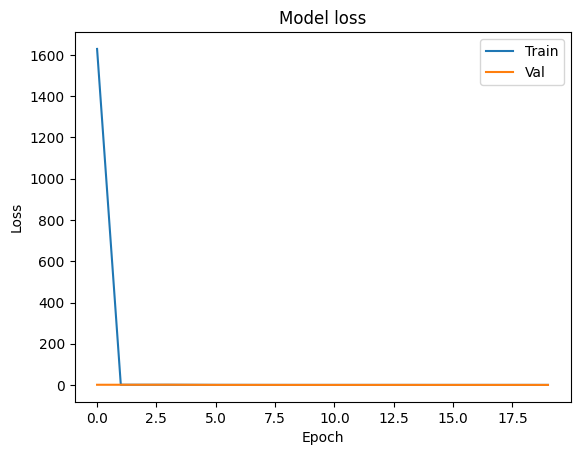

In [90]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [ ]:
# Our model converges really fast with using mean squared error lost function. By looking the loss and validation loss values we can say we dont have
# overfitting with predictions since our loss and validation loss converged at close numbers and we dont have a big difference.
# Also we have a bad scaled graph because of high loss at starting, we can look to the values in list form given below and make the same comments.


In [91]:
hist.history['loss']

[1628.9921875,
 1.3957011699676514,
 1.3764265775680542,
 1.3480885028839111,
 1.1967955827713013,
 0.935265064239502,
 0.8727573156356812,
 0.6860623359680176,
 0.6677820682525635,
 0.6467607021331787,
 0.6394571661949158,
 0.6366757154464722,
 0.6369916796684265,
 0.6492341160774231,
 0.6212646961212158,
 0.6327148675918579,
 0.6227173805236816,
 0.6384406089782715,
 0.6458334922790527,
 0.6292092800140381]

In [92]:
hist.history['val_loss']

[1.3840899467468262,
 1.3790247440338135,
 1.3759373426437378,
 1.4949697256088257,
 1.073173999786377,
 0.8046289086341858,
 0.7125245928764343,
 0.775240421295166,
 0.6623964905738831,
 0.6454007029533386,
 0.6398743391036987,
 0.6660552024841309,
 0.674017071723938,
 0.7358132004737854,
 0.6231474280357361,
 0.6797879338264465,
 0.656650960445404,
 0.6226813197135925,
 0.6849727034568787,
 0.6182396411895752]

In [ ]:
# To make better comments now I will add confusion matrix.

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [96]:
conf_1 = confusion_matrix(y_test, rounded_predictions)

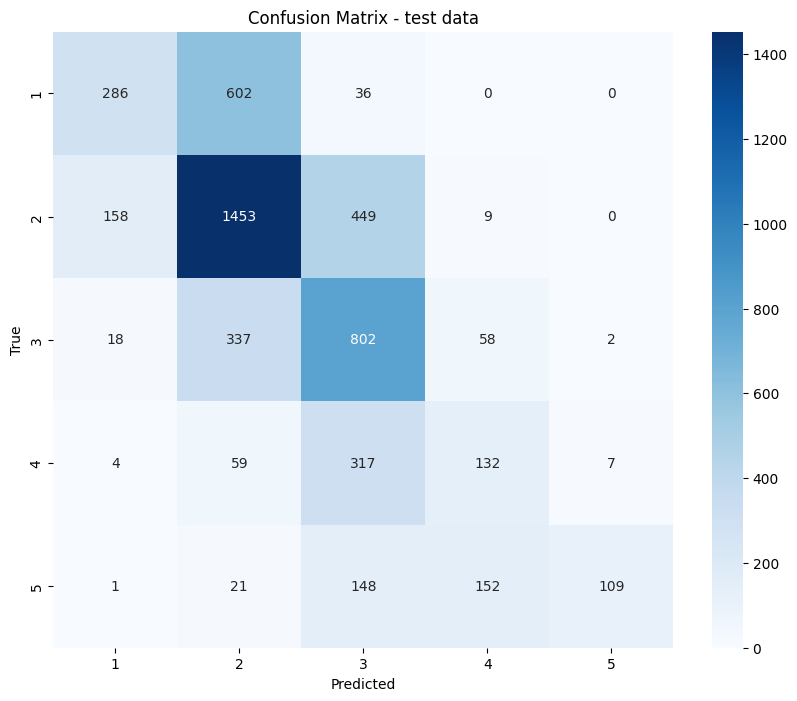

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_1, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, 6), yticklabels=np.arange(1, 6))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - test data')
plt.show()

### Q5) If the test accuracy in Q4 is below 67%, define proper feature engineering and hyperparameter tuning processes (or another modification) to improve the performance.  Plot loss curves. Try to figure out whether there is overfitting or underfitting.

In [ ]:
# since we have 53 percent accuracy I will add feature engineering, hyperparameter tuning.

In [109]:
from keras.layers import Dropout
from keras import regularizers

model2 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear'),
])

In [ ]:
# In this model I will use scaled data (which is used for second svm code above), add dropouts and a L2 regularizer.

In [111]:
model2.compile(optimizer='adam', loss='mse')

hist2 = model2.fit(X_train_scaled, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
,436/436 [==============================] - 6s 4ms/step - loss: 1.7616 - val_loss: 0.9415
,Epoch 2/20
,436/436 [==============================] - 3s 6ms/step - loss: 0.9210 - val_loss: 0.8232
,Epoch 3/20
,436/436 [==============================] - 3s 6ms/step - loss: 0.8080 - val_loss: 0.7747
,Epoch 4/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.7499 - val_loss: 0.7276
,Epoch 5/20
,436/436 [==============================] - 2s 5ms/step - loss: 0.7046 - val_loss: 0.6924
,Epoch 6/20
,436/436 [==============================] - 2s 5ms/step - loss: 0.6678 - val_loss: 0.6609
,Epoch 7/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.6427 - val_loss: 0.6352
,Epoch 8/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.6203 - val_loss: 0.6212
,Epoch 9/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.6037 - val_loss: 0.6025
,Epoch 10/20
,436/436 [==============================] - 1s 3ms/step - loss: 0.5837

In [112]:
predictions2 = model2.predict(X_test_scaled)

162/162 [==============================] - 1s 6ms/step


In [113]:
predictions2

array([[1.2372692],
       [2.2180595],
       [3.9782324],
       ...,
       [2.012907 ],
       [2.750502 ],
       [4.3554707]], dtype=float32)

In [122]:
rounded_predictions2 = np.round(predictions2)
rounded_predictions2 = np.clip(rounded_predictions2, 1, 5)

In [123]:
accuracy2 = accuracy_score(y_test, rounded_predictions2)
print("Accuracy of test data:", accuracy2)

Accuracy of test data: 0.6168604651162791


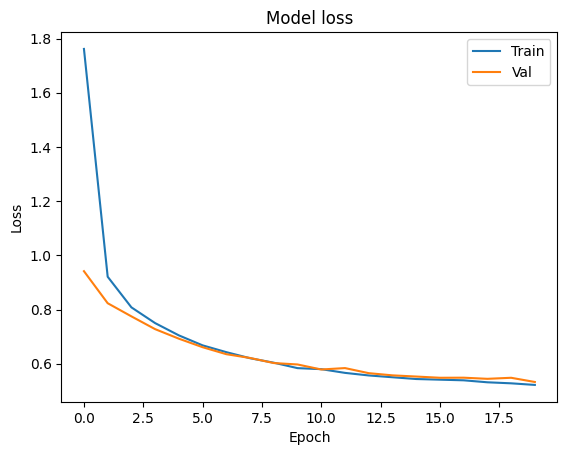

In [124]:

plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [125]:
conf_2 = confusion_matrix(y_test, rounded_predictions2)

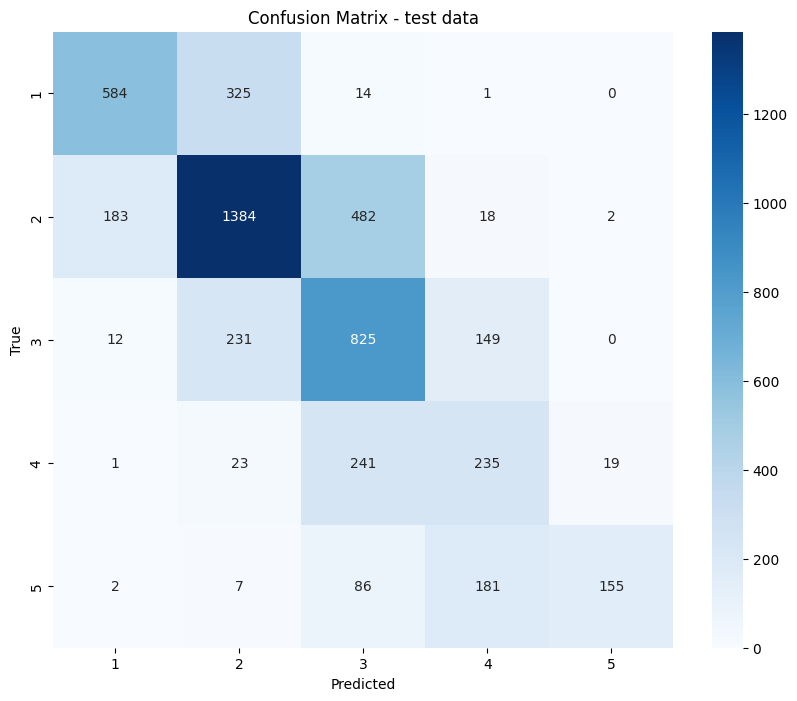

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_2, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(1, 6), yticklabels=np.arange(1, 6))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - test data')
plt.show()

In [ ]:
# This time model performed 61 percent succes which is better than without scaling, dropout and L2. Our model doesnt have overfitting since we loss graph is not differ too much and we get a good confusion matrix.
# We have a slight underfit because of low score respectively.